<a href="https://colab.research.google.com/github/huavanson/CS114.K21/blob/master/time_size_round_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math

Lấy dữ liệu xuống bằng URL


In [59]:
data=pd.read_csv('http://cs.uit.edu.vn/data3.txt',names=['size','time'])
data.head()

,size,time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [60]:
print(data.shape)

(10590, 2)


Thêm 2 cột size^2 và size*log(size) để tránh overfit và tăng khả năng dự đoán 

In [61]:
data['size^2']=data['size']*data['size']
data['size*log(size)']=data['size']*np.log10(data['size'])
new_columns=['size','size^2','size*log(size)','time']
data=data.reindex(columns=new_columns)
data.head()


,size,size^2,size*log(size),time
0,37837612,1431684881862544,2.867305e+08,4.12166
1,37395246,1398404423400516,2.831873e+08,3.92089
2,36610827,1340352653623929,2.769100e+08,3.21540
3,29555651,873536506033801,2.207996e+08,2.54506
4,25928216,672272384942656,1.922259e+08,2.21831


Biểu diễn dữ liệu 

(10590, 4)


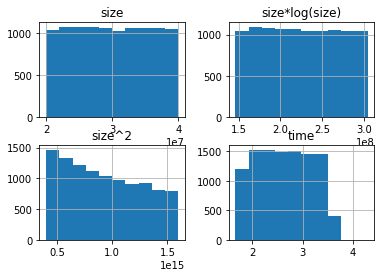

In [62]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
print(data.shape)
data.hist()
pyplot.show()

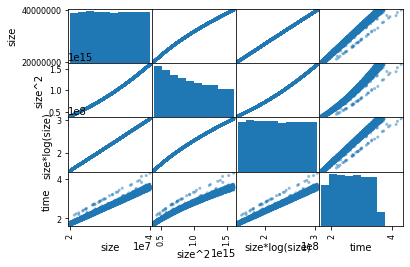

In [63]:
scatter_matrix(data)
pyplot.show()

Chia data với tỷ lệ 80-20

In [0]:
from sklearn.model_selection import train_test_split
arr=data.values
X=arr[:,0:3]
y=arr[:,3]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [65]:
pd.DataFrame(X_train).head()
#pd.DataFrame(y_train).head()

,0,1,2
0,23183337.0,5.374671e+14,1.707494e+08
1,37581818.0,1.412393e+15,2.846814e+08
2,26306459.0,6.920298e+14,1.951956e+08
3,21919409.0,4.804605e+14,1.609066e+08
4,21690180.0,4.704639e+14,1.591249e+08


Chọn model bằng cách tính mean_absolute_error . Model nào có mean_absolute_error thấp là model đó tốt . Mean_absolute_error tính bằng cách sau khi cho model fit sẽ trả về giá trị y_valid dự đoán , lấy giá trị đó so sánh với y_valid thực tế để xem sự chênh lệch

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
models = []
models.append(('LN',LinearRegression()))
models.append(('RF',RandomForestRegressor()))
models.append(('DT',DecisionTreeRegressor()))
for name, model in models:
  print('fiting and training ',name)
  model.fit(X_train,y_train)
  val_pre=model.predict(X_validation)
  cv_results=mean_absolute_error(y_validation,val_pre)
  print(cv_results)

fiting and training  LN
0.04301142916048239
fiting and training  RF
0.051255129470037714
fiting and training  DT
0.05845102533836954


LinearRegression là model tốt nhất có MAE là 0.043
> Indented block



In [73]:
my_model=LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Đưa 1 test tự cho vào để predict 

In [76]:
test_size=6083695
test_size2=test_size*test_size
test_size3=test_size*np.log10(test_size)
new_test_model=[[test_size,test_size2,test_size3]]
my_pre=my_model.predict(new_test_model)
print(my_pre)

[0.35024653]


In [77]:
data=pd.read_csv('http://cs.uit.edu.vn/data3.txt',names=['size','time'])
data.head()

,size,time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [0]:
from sklearn.model_selection import train_test_split
arr=data.values
X=arr[:,0:1]
y=arr[:,1]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [79]:

my_model=LinearRegression()
my_model.fit(X_train,y_train)
my_pre=my_model.predict(X_validation)
print(mean_absolute_error(y_validation,my_pre))

0.04294798308974453


 kết quả tệ hơn 
 vấn đề gặp phải là MAE khi sử dụng model của round 2 là 0.0429 còn khi sử dụng của round 3 là 0.043
vì chỉ số MAE nhỏ chứng minh model đó tốt hơn 
